<a href="https://colab.research.google.com/github/pachterlab/LSCHWCP_2023/blob/main/Notebooks/Figure_4/Figure_4a/compare_host_masking_options.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comparison of the different host masking options
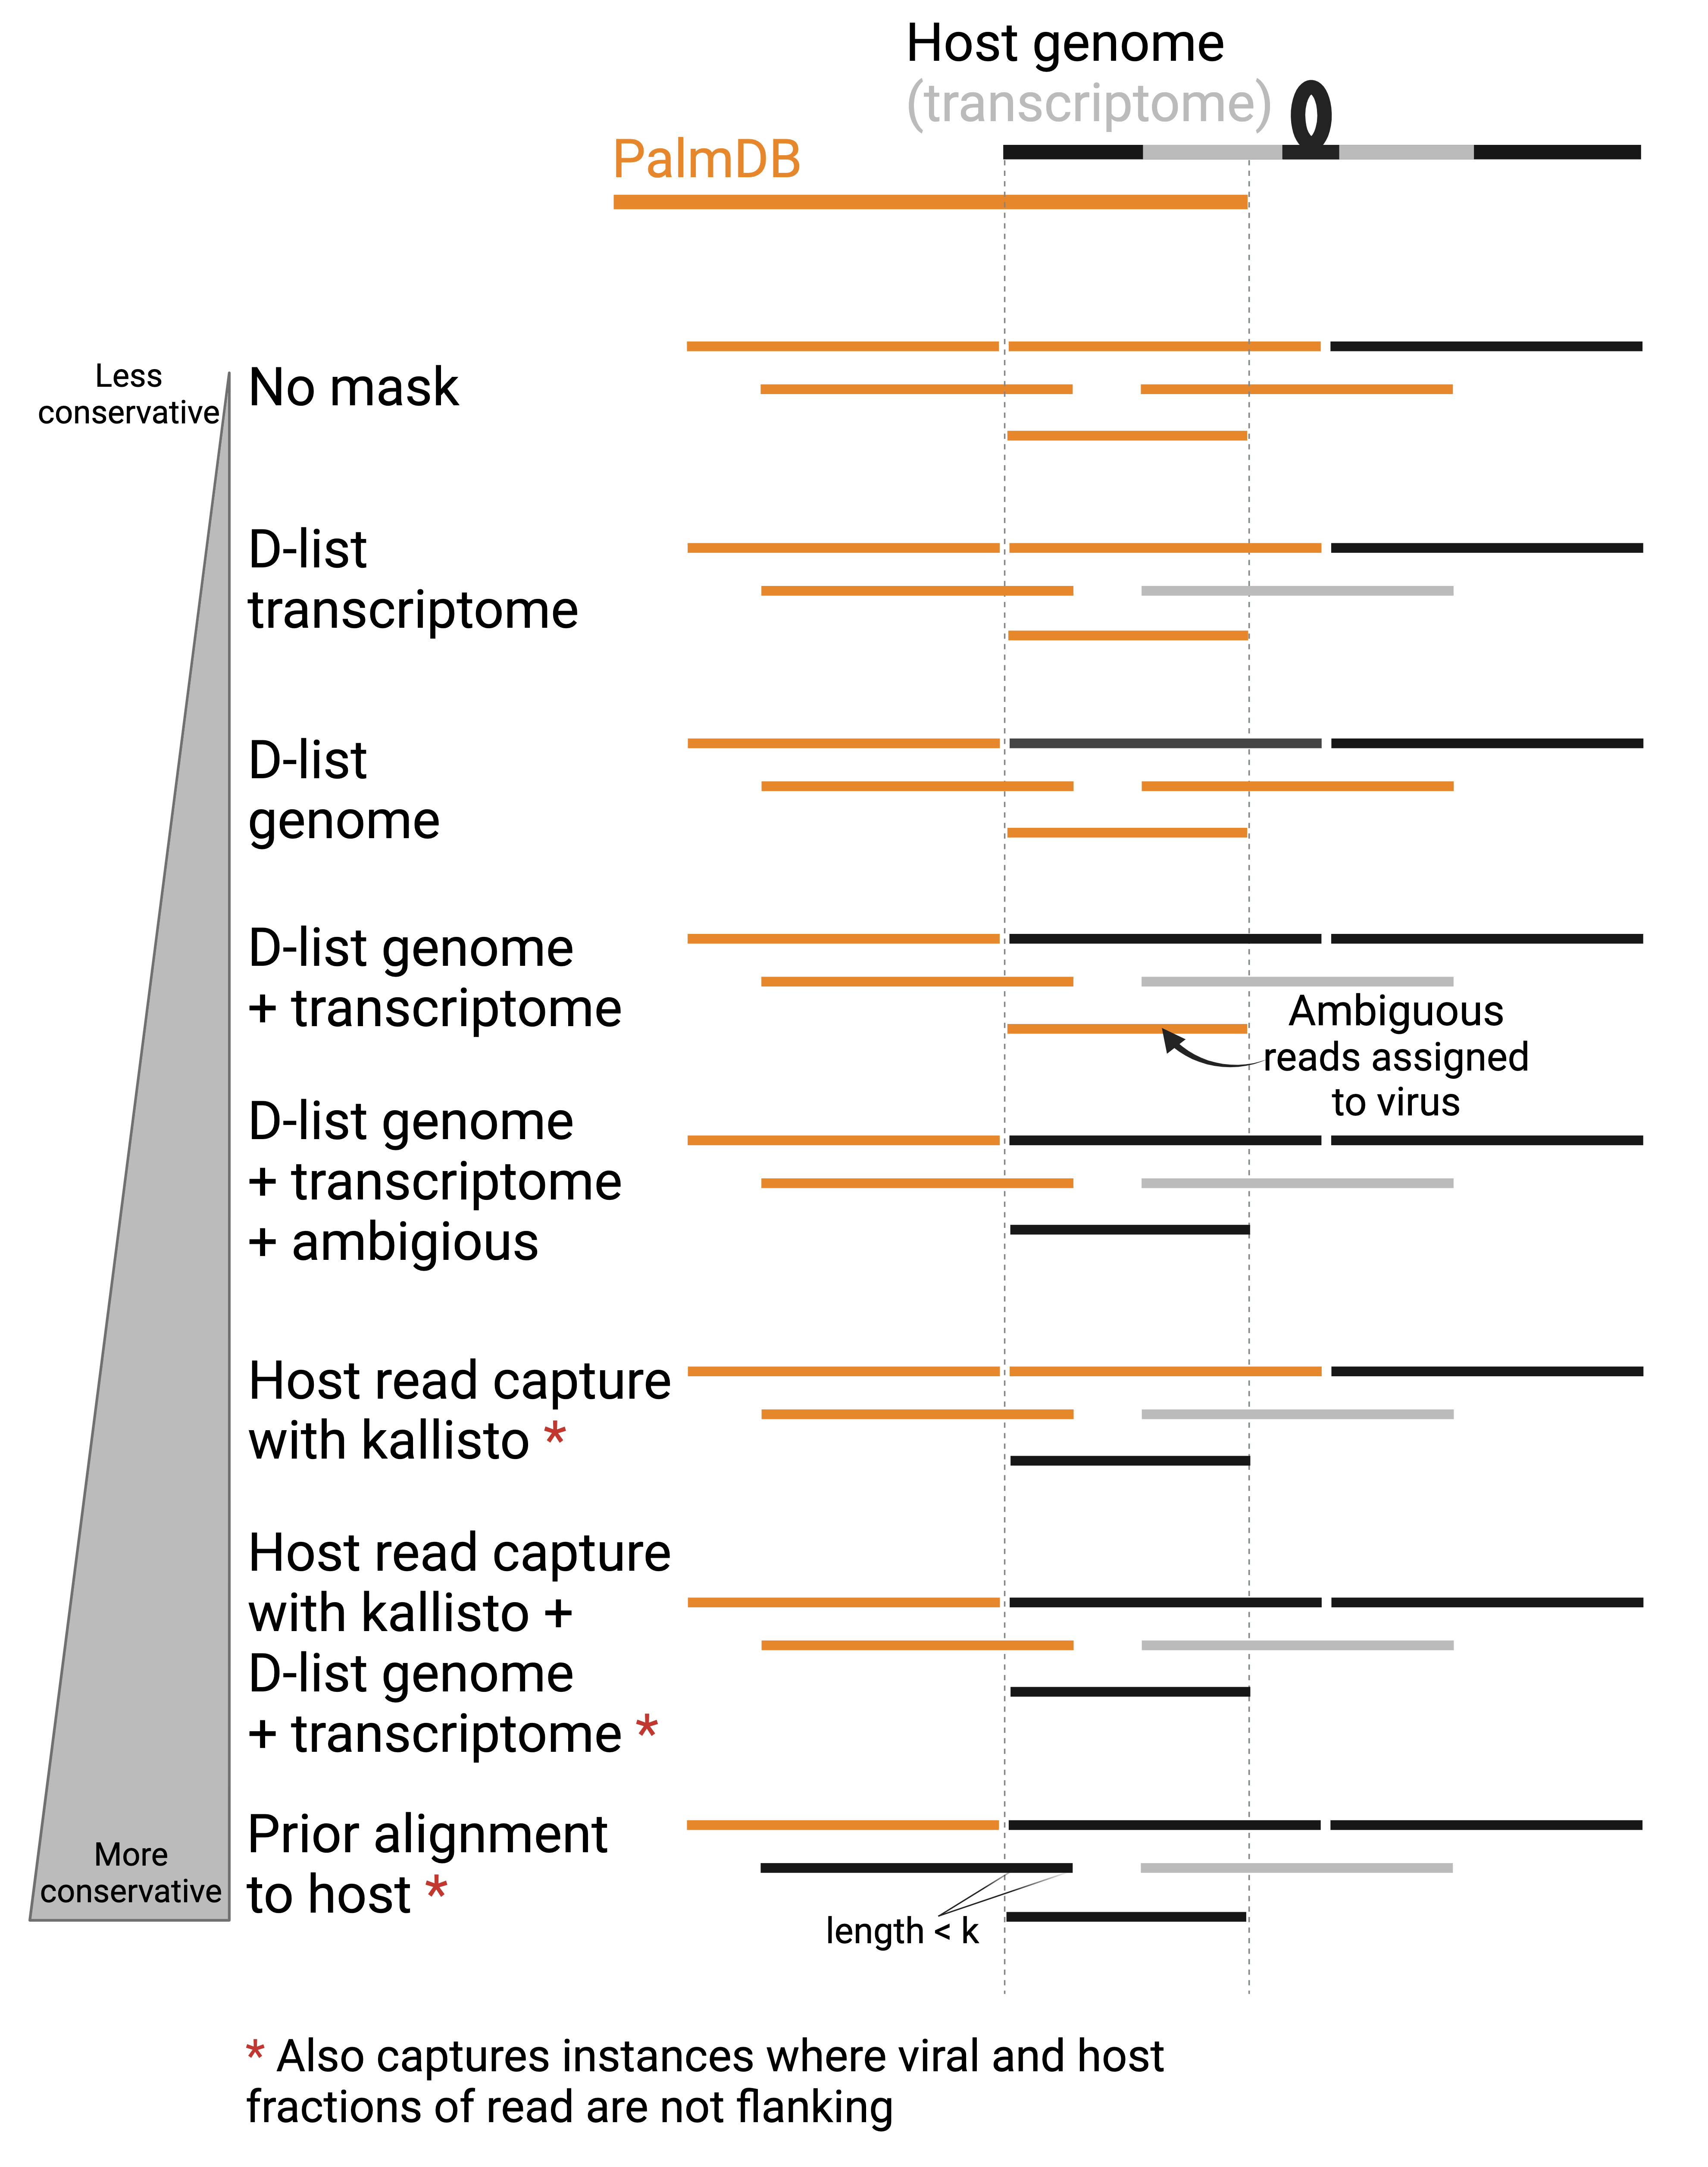

In [ ]:
!pip install -q anndata
import numpy as np
import anndata
import pandas as pd
import json
import os
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
%config InlineBackend.figure_format='retina'

def nd(arr):
    """
    Function to transform numpy matrix to nd array.
    """
    return np.asarray(arr).reshape(-1)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.2/119.2 kB 3.5 MB/s eta 0:00:00


# Fetch count matrices from Caltech Data
Load count matrices in the same order as displayed in the overview above. The alignments were performed and count matrices generated [here](https://github.com/pachterlab/LSCHWCP_2023/tree/main/Notebooks/align_macaque_PBMC_data).

In [ ]:
# Download data from Caltech Data
!wget https://data.caltech.edu/records/sh33z-hrx98/files/virus_no_mask.h5ad?download=1
!wget https://data.caltech.edu/records/sh33z-hrx98/files/virus_dlist_cdna.h5ad?download=1
!wget https://data.caltech.edu/records/sh33z-hrx98/files/virus_dlist_dna.h5ad?download=1
!wget https://data.caltech.edu/records/sh33z-hrx98/files/virus_dlist_cdna_dna.h5ad?download=1
!wget https://data.caltech.edu/records/sh33z-hrx98/files/virus_dlist_cdna_dna_ambiguous.h5ad?download=1
!wget https://data.caltech.edu/records/sh33z-hrx98/files/virus_host-captured.h5ad?download=1
!wget https://data.caltech.edu/records/sh33z-hrx98/files/virus_host-captured_dlist_cdna_dna.h5ad?download=1
!wget https://data.caltech.edu/records/sh33z-hrx98/files/virus_bwa.h5ad?download=1

# Remove '?download=1' from filenames
for file in glob.glob("*.h5ad*"):
  old = file.split("/")[-1]
  new = file.split("/")[-1].split("?")[0]
  !mv $old $new

In [ ]:
nomask_adata = anndata.read_h5ad("/content/virus_no_mask.h5ad")
nomask_adata

In [ ]:
cdna_adata = anndata.read_h5ad("/content/virus_dlist_cdna.h5ad")
cdna_adata

In [ ]:
dna_adata = anndata.read_h5ad("/content/virus_dlist_dna.h5ad")
dna_adata

In [ ]:
cdna_dna_adata = anndata.read_h5ad("/content/virus_dlist_cdna_dna.h5ad")
cdna_dna_adata

In [ ]:
cdna_dna_amb_adata = anndata.read_h5ad("/content/virus_dlist_cdna_dna_ambiguous.h5ad")
cdna_dna_amb_adata

In [ ]:
busfil_adata = anndata.read_h5ad("/content/virus_host-captured.h5ad")
busfil_adata

In [ ]:
busfil_cdna_dna_adata = anndata.read_h5ad("/content/virus_host-captured_dlist_cdna_dna.h5ad")
busfil_cdna_dna_adata

In [ ]:
bwa_adata = anndata.read_h5ad("/content/virus_bwa.h5ad")
bwa_adata

___

### Plot total number of sOTUs detected by each host masking option

In [ ]:
%%time
fig, ax = plt.subplots(figsize=(5, 13))
width = 0.6
fontsize = 14

# Get number of viruses with counts > 0
nomask_vcounts = (np.array(nomask_adata[:, nomask_adata.var["v_type"] != "below_threshold"].X.todense()) > 0).sum(0)
dna_vcounts = (np.array(dna_adata[:, dna_adata.var["v_type"] != "below_threshold"].X.todense()) > 0).sum(0)
cdna_vcounts = (np.array(cdna_adata[:, cdna_adata.var["v_type"] != "below_threshold"].X.todense()) > 0).sum(0)
cdna_dna_vcounts = (np.array(cdna_dna_adata[:, cdna_dna_adata.var["v_type"] != "below_threshold"].X.todense()) > 0).sum(0)
cdna_dna_amb_vcounts = (np.array(cdna_dna_amb_adata[:, cdna_dna_amb_adata.var["v_type"] != "below_threshold"].X.todense()) > 0).sum(0)
bus_vcounts = (np.array(busfil_adata[:, busfil_adata.var["v_type"] != "below_threshold"].X.todense()) > 0).sum(0)
bus_cdna_dna_vcounts = (np.array(busfil_cdna_dna_adata[:, busfil_cdna_dna_adata.var["v_type"] != "below_threshold"].X.todense()) > 0).sum(0)
bwa_vcounts = (np.array(bwa_adata[:, bwa_adata.var["v_type"] != "below_threshold"].X.todense()) > 0).sum(0)

labels = [
    "kallisto (no mask)",
    "kallisto + d-list\ntranscriptome",
    "kallisto + d-list\ngenome",
    "kallisto + d-list\ngenome+transcriptome",
    "kallisto + d-list\ngenome+transcriptome+ambigious",
    "kallisto + bustools capture filtering",
    "kallisto + bustools capture filtering\n+ d-list genome+transcriptome",
    "kallisto + bwa",
][::-1]


single_color = "#e7882a"
ax.barh(7, len(nomask_vcounts), width, color=single_color)
ax.text(len(nomask_vcounts)+1, 7, "{:,}".format(len(nomask_vcounts)), color="black", fontsize=fontsize, va="center", ha="left")

ax.barh(6, len(cdna_vcounts), width, color=single_color)
ax.text(len(cdna_vcounts)+1, 6, "{:,}".format(len(cdna_vcounts)), color="black", fontsize=fontsize, va="center", ha="left")

ax.barh(5, len(dna_vcounts), width, color=single_color)
ax.text(len(dna_vcounts)+1, 5, "{:,}".format(len(dna_vcounts)), color="black", fontsize=fontsize, va="center", ha="left")

ax.barh(4, len(cdna_dna_vcounts), width, color=single_color)
ax.text(len(cdna_dna_vcounts)+1, 4, "{:,}".format(len(cdna_dna_vcounts)), color="black", fontsize=fontsize, va="center", ha="left")

ax.barh(3, len(cdna_dna_amb_vcounts), width, color=single_color)
ax.text(len(cdna_dna_amb_vcounts)+1, 3, "{:,}".format(len(cdna_dna_amb_vcounts)), color="black", fontsize=fontsize, va="center", ha="left")

ax.barh(2, len(bus_vcounts), width, color=single_color)
ax.text(len(bus_vcounts)+1, 2, "{:,}".format(len(bus_vcounts)), color="black", fontsize=fontsize, va="center", ha="left")

ax.barh(1, len(bus_cdna_dna_vcounts), width, color=single_color)
ax.text(len(bus_cdna_dna_vcounts)+1, 1, "{:,}".format(len(bus_cdna_dna_vcounts)), color="black", fontsize=fontsize, va="center", ha="left")

ax.barh(0, len(bwa_vcounts), width, color=single_color)
ax.text(len(bwa_vcounts)+1, 0, "{:,}".format(len(bwa_vcounts)), color="black", fontsize=fontsize, va="center", ha="left")

# ax.set_yscale("symlog")
ax.margins(y=0.01)

ax.tick_params(axis="both", labelsize=fontsize)
ax.set_yticks(np.arange(len(labels)), labels, fontsize=fontsize)

# ax.set_xlabel("Workflow", fontsize=fontsize)
ax.set_xlabel("# distinct sOTUs detected", fontsize=fontsize)
ax.spines[["right", "top"]].set_visible(False)

ax.set_title(f"Number of viruses\ndetected for each workflow", fontsize=fontsize)

ax.grid(True, which="both", color="lightgray", ls="--", lw=1)
ax.set_axisbelow(True)
ax.yaxis.grid(False)

plt.savefig("bwa_vs_dlist_sOTUs.png", dpi=300, bbox_inches="tight")

fig.show()

In [ ]:
%%time
# Same but horizontal bars
fig, ax = plt.subplots(figsize=(3, 6))
width = 0.5
fontsize = 14

# Get number of viruses with counts > 0
nomask_vcounts = (np.array(nomask_adata[:, nomask_adata.var["v_type"] != "below_threshold"].X.todense()) > 0).sum(0)
cdna_dna_vcounts = (np.array(cdna_dna_adata[:, cdna_dna_adata.var["v_type"] != "below_threshold"].X.todense()) > 0).sum(0)
bus_vcounts = (np.array(busfil_adata[:, busfil_adata.var["v_type"] != "below_threshold"].X.todense()) > 0).sum(0)
bus_cdna_dna_vcounts = (np.array(busfil_cdna_dna_adata[:, busfil_cdna_dna_adata.var["v_type"] != "below_threshold"].X.todense()) > 0).sum(0)
bwa_vcounts = (np.array(bwa_adata[:, bwa_adata.var["v_type"] != "below_threshold"].X.todense()) > 0).sum(0)

labels = [
    "kallisto (no mask)",
    "kallisto + d-list\ngenome+transcriptome",
    "kallisto + bustools capture filtering",
    "kallisto + bustools capture filtering\n+ d-list genome+transcriptome",
    "kallisto + bwa",
][::-1]

single_color = "#e7882a"
ax.barh(4, len(nomask_vcounts), width, color=single_color)
ax.text(len(nomask_vcounts)+1, 4, "{:,}".format(len(nomask_vcounts)), color="black", fontsize=fontsize, va="center", ha="left")
ax.barh(3, len(cdna_dna_vcounts), width, color=single_color)
ax.text(len(cdna_dna_vcounts)+1, 3, "{:,}".format(len(cdna_dna_vcounts)), color="black", fontsize=fontsize, va="center", ha="left")
ax.barh(2, len(bus_vcounts), width, color=single_color)
ax.text(len(bus_vcounts)+1, 2, "{:,}".format(len(bus_vcounts)), color="black", fontsize=fontsize, va="center", ha="left")
ax.barh(1, len(bus_cdna_dna_vcounts), width, color=single_color)
ax.text(len(bus_cdna_dna_vcounts)+1, 1, "{:,}".format(len(bus_cdna_dna_vcounts)), color="black", fontsize=fontsize, va="center", ha="left")
ax.barh(0, len(bwa_vcounts), width, color=single_color)
ax.text(len(bwa_vcounts)+1, 0, "{:,}".format(len(bwa_vcounts)), color="black", fontsize=fontsize, va="center", ha="left")

# ax.set_yscale("symlog")
ax.margins(y=0.01)

ax.tick_params(axis="both", labelsize=fontsize)
ax.set_yticks(np.arange(len(labels)), labels, fontsize=fontsize)

# ax.set_xlabel("Workflow", fontsize=fontsize)
ax.set_xlabel("# distinct sOTUs detected", fontsize=fontsize)
ax.spines[["right", "top"]].set_visible(False)

# ax.set_title(f"Number of viruses\ndetected for each workflow", fontsize=fontsize)

ax.grid(True, which="both", color="lightgray", ls="--", lw=1)
ax.set_axisbelow(True)
ax.yaxis.grid(False)

plt.savefig("bwa_vs_dlist_sOTUs_short.png", dpi=300, bbox_inches="tight")

fig.show()

### Plot number of positive cells detected for each sOTU/virus ID in each masking option

In [ ]:
%%time
df_virs = pd.DataFrame()

virus_list = list(
    set(
        list(nomask_adata[:, nomask_adata.var["v_type"] != "below_threshold"].var.index)
        + list(cdna_adata[:, cdna_adata.var["v_type"] != "below_threshold"].var.index)
        + list(dna_adata[:, dna_adata.var["v_type"] != "below_threshold"].var.index)
        + list(cdna_dna_adata[:, cdna_dna_adata.var["v_type"] != "below_threshold"].var.index)
        + list(cdna_dna_amb_adata[:, cdna_dna_amb_adata.var["v_type"] != "below_threshold"].var.index)
        + list(busfil_adata[:, busfil_adata.var["v_type"] != "below_threshold"].var.index)
        + list(busfil_cdna_dna_adata[:, busfil_cdna_dna_adata.var["v_type"] != "below_threshold"].var.index)
        + list(bwa_adata[:, bwa_adata.var["v_type"] != "below_threshold"].var.index)
    )
)
virus_list = np.sort(np.array(virus_list))

no_mask = []
cdna_dlist = []
dna_dlist = []
cdna_dna_dlist = []
cdna_dna_amb_dlist = []
bus = []
bus_dlist = []
bwa = []
for i, virus in enumerate(virus_list):
    no_mask.append(nomask_adata[:, (nomask_adata.var.index == virus) & (nomask_adata.var["v_type"] != "below_threshold")].X.sum())
    cdna_dlist.append(cdna_adata[:, (cdna_adata.var.index == virus) & (cdna_adata.var["v_type"] != "below_threshold")].X.sum())
    dna_dlist.append(dna_adata[:, (dna_adata.var.index == virus) & (dna_adata.var["v_type"] != "below_threshold")].X.sum())
    cdna_dna_dlist.append(cdna_dna_adata[:, (cdna_dna_adata.var.index == virus) & (cdna_dna_adata.var["v_type"] != "below_threshold")].X.sum())
    cdna_dna_amb_dlist.append(
        cdna_dna_amb_adata[:, (cdna_dna_amb_adata.var.index == virus) & (cdna_dna_amb_adata.var["v_type"] != "below_threshold")].X.sum()
    )
    bus.append(busfil_adata[:, (busfil_adata.var.index == virus) & (busfil_adata.var["v_type"] != "below_threshold")].X.sum())
    bus_dlist.append(busfil_cdna_dna_adata[:, (busfil_cdna_dna_adata.var.index == virus) & (busfil_cdna_dna_adata.var["v_type"] != "below_threshold")].X.sum())
    bwa.append(bwa_adata[:, (bwa_adata.var.index == virus) & (bwa_adata.var["v_type"] != "below_threshold")].X.sum())

df_virs["virus"] = virus_list
df_virs["no_mask"] = no_mask
df_virs["cdna_dlist"] = cdna_dlist
df_virs["dna_dlist"] = dna_dlist
df_virs["cdna_dna_dlist"] = cdna_dna_dlist
df_virs["cdna_dna_amb_dlist"] = cdna_dna_amb_dlist
df_virs["bus"] = bus
df_virs["bus_cdna_dna"] = bus_dlist
df_virs["bwa"] = bwa

# Sort data frame by virus counts per category
# df_virs = df_virs.sort_values(["no_mask", "cdna_dlist", "dna_dlist", "cdna_dna_dlist", "bwa"])

# Sort data frame by whether all categories have the virus
df_virs["cat_count"] = (
    df_virs[
        [
            "no_mask",
            "cdna_dlist",
            "dna_dlist",
            "cdna_dna_dlist",
            "cdna_dna_amb_dlist",
            "bus",
            "bus_cdna_dna",
            "bwa",
        ]
    ]
    > 0
).sum(1)
df_virs = df_virs.sort_values(
    [
        "cat_count",
        "no_mask",
        "cdna_dlist",
        "dna_dlist",
        "cdna_dna_dlist",
        "cdna_dna_amb_dlist",
        "bus",
        "bus_cdna_dna",
        "bwa",
    ]
)

df_virs

Only plot a subset of viruses for main figure:

In [ ]:
%%time
fig, ax = plt.subplots(figsize=(7, 20))
width = 0.1
fontsize = 20

colors = ["gold", "orange", "#e06237", "#b2172b", "#7d0d0f", "#3e8938", "#b8dd5a", "#003049", "grey"]

virs = [
    # macaque only
    'u10',
    'u102540',
    'u11150',
    'u39566',
    # shared (all over the place)
    'u1001',
    'u202260',
    'u102324',
    # shared (patterned)
    'u103829',
    # Not filtered out by d-list
    'u164445',
    # Not filtered out by capture
    'u162905',
    # Weird combos
    "u41991",
    # No masking only
    'u149397'
]

virs = virs[::-1]

for i, virus in enumerate(virs):
    if i == 0:
        ax.barh(i+3.5*width, df_virs[df_virs["virus"] == virus]["no_mask"], width, label="kallisto (no mask)", color=colors[0])
        ax.barh(i+2.5*width, df_virs[df_virs["virus"] == virus]["cdna_dlist"], width, label="kallisto + d-list transcriptome", color=colors[1])
        ax.barh(i+1.5*width, df_virs[df_virs["virus"] == virus]["dna_dlist"], width, label="kallisto + d-list genome", color=colors[2])
        ax.barh(i+width/2, df_virs[df_virs["virus"] == virus]["cdna_dna_dlist"], width, label="kallisto + d-list genome+transcriptome", color=colors[3])
        ax.barh(i-width/2, df_virs[df_virs["virus"] == virus]["cdna_dna_amb_dlist"], width, label="kallisto + d-list genome+transcriptome+ambigious", color=colors[4])
        ax.barh(i-1.5*width, df_virs[df_virs["virus"] == virus]["bus"], width, label="kallisto + bus capture filtering", color=colors[5])
        ax.barh(i-2.5*width, df_virs[df_virs["virus"] == virus]["bus_cdna_dna"], width, label="kallisto + bus capture filtering + d-list genome+transcriptome", color=colors[6])
        ax.barh(i-3.5*width, df_virs[df_virs["virus"] == virus]["bwa"], width, label="kallisto + bwa", color=colors[7])

    else:
        ax.barh(i+3.5*width, df_virs[df_virs["virus"] == virus]["no_mask"], width, color=colors[0])
        ax.barh(i+2.5*width, df_virs[df_virs["virus"] == virus]["cdna_dlist"], width, color=colors[1])
        ax.barh(i+1.5*width, df_virs[df_virs["virus"] == virus]["dna_dlist"], width, color=colors[2])
        ax.barh(i+width/2, df_virs[df_virs["virus"] == virus]["cdna_dna_dlist"], width, color=colors[3])
        ax.barh(i-width/2, df_virs[df_virs["virus"] == virus]["cdna_dna_amb_dlist"], width, color=colors[4])
        ax.barh(i-1.5*width, df_virs[df_virs["virus"] == virus]["bus"], width, color=colors[5])
        ax.barh(i-2.5*width, df_virs[df_virs["virus"] == virus]["bus_cdna_dna"], width, color=colors[6])
        ax.barh(i-3.5*width, df_virs[df_virs["virus"] == virus]["bwa"], width, color=colors[7])

ax.legend(fontsize=fontsize, loc='upper left', bbox_to_anchor=(1.04, 1))

ax.set_xscale("symlog")
ax.margins(y=0.01)

ax.tick_params(axis="both", labelsize=fontsize)
ax.set_yticks(np.arange(len(virs)), virs, fontsize=fontsize)

ax.set_ylabel("Virus ID", fontsize=fontsize)
ax.set_xlabel("# positive cells", fontsize=fontsize)

ax.set_title(f"Positive cells per virus ID for each workflow\nAll viruses; all cells", fontsize=fontsize)

ax.grid(True, which="both", color="lightgray", ls="--", lw=1)
ax.set_axisbelow(True)
ax.yaxis.grid(False)

# plt.savefig("bwa_vs_dlist_per_virus_short.png", dpi=300, bbox_inches="tight")

fig.show()

In [ ]:
%%time
# Same but with muted colors
fig, ax = plt.subplots(figsize=(5, 15))
width = 0.15
fontsize = 20

colors = [
    "white",
    "#DCDCDC",
    "#C0C0C0",
    "#808080",
    "black",
]
ec="black"

virs = virs[::-1]
mask_ops = ["no_mask", "cdna_dna_dlist", "bus", "bus_cdna_dna", "bwa"]
labels = ["No mask", "D-list genome + transcriptome", "Host read capture with kallisto", "Host read capture with kallisto +\nD-list genome + transcriptome", "Prior alignment to host with bwa"]
for i, virus in enumerate(virs):
    y_locs = [i+2*width, i+width, i, i-width, i-2*width]

    if i == 0:
        for color_idx, (y, mask_opt, label) in enumerate(zip(y_locs, mask_ops, labels)):
            count = int(df_virs[df_virs["virus"] == virus][mask_opt].values[0])
            # Plot bar plot with label
            ax.barh(y, count, width, label=label, color=colors[color_idx], edgecolor=ec, lw=1)
            # if count > 0:
            # Add text next to bar
            ax.text(count+1, y, "{:,}".format(count), fontsize=fontsize-10, va="center")

    else:
        for color_idx, (y, mask_opt) in enumerate(zip(y_locs, mask_ops)):
            count = int(df_virs[df_virs["virus"] == virus][mask_opt].values[0])
            # Plot bar plot without label
            ax.barh(y, count, width, color=colors[color_idx], edgecolor=ec, lw=1)
            # if count > 0:
            # Add text next to bar
            ax.text(count+1, y, "{:,}".format(count), fontsize=fontsize-10, va="center")

# ax.legend(fontsize=fontsize, loc='upper left', bbox_to_anchor=(1.04, 1))
ax.legend(fontsize=fontsize, loc='upper center', bbox_to_anchor=(0.3, -0.08))

ax.set_xscale("log")
ax.margins(y=0.01)
ax.set_xlim(left=1, right=12**6)

ax.tick_params(axis="both", labelsize=fontsize)
ax.set_yticks(np.arange(len(virs)), virs, fontsize=fontsize)

ax.set_ylabel("Virus ID", fontsize=fontsize+2)
ax.set_xlabel("# positive cells", fontsize=fontsize+2)

# ax.set_title(f"# positive cells per sOTU", fontsize=fontsize)

ax.grid(True, which="both", color="lightgray", ls="--", lw=1)
ax.set_axisbelow(True)
ax.yaxis.grid(False)

plt.savefig("bwa_vs_dlist_per_virus_short.png", dpi=300, bbox_inches="tight")

fig.show()

Plot number of positive cells per masking options for all viruses:

In [ ]:
%%time
virs_per_col = 75
ncols = int(np.ceil(len(df_virs["virus"].values) / virs_per_col))

fig, axs = plt.subplots(figsize=(ncols*10, 50), ncols=ncols, gridspec_kw={'wspace': 0.3})
width = 0.1
fontsize = 20

colors = ["gold", "orange", "#e06237", "#b2172b", "#7d0d0f", "#3e8938", "#b8dd5a", "#003049", "grey"]

master_vir_labels = []
vir_labels = []
ax_num = 0
ax = axs[ax_num]
vir_count = 0
for i, virus in enumerate(df_virs["virus"].values):
    if vir_count >= virs_per_col:
        master_vir_labels.append(vir_labels)
        ax_num += 1
        ax = axs[ax_num]
        vir_labels = []
        vir_count = 0

    if i == 0:
        ax.barh(i+3.5*width, df_virs[df_virs["virus"] == virus]["no_mask"], width, label="No mask", color=colors[0])
        ax.barh(i+2.5*width, df_virs[df_virs["virus"] == virus]["cdna_dlist"], width, label="D-list transcriptome", color=colors[1])
        ax.barh(i+1.5*width, df_virs[df_virs["virus"] == virus]["dna_dlist"], width, label="D-list genome", color=colors[2])
        ax.barh(i+width/2, df_virs[df_virs["virus"] == virus]["cdna_dna_dlist"], width, label="D-list genome + transcriptome", color=colors[3])
        ax.barh(i-width/2, df_virs[df_virs["virus"] == virus]["cdna_dna_amb_dlist"], width, label="D-list genome + transcriptome + ambigious reads filtered", color=colors[4])
        ax.barh(i-1.5*width, df_virs[df_virs["virus"] == virus]["bus"], width, label="Host read capture with kallisto", color=colors[5])
        ax.barh(i-2.5*width, df_virs[df_virs["virus"] == virus]["bus_cdna_dna"], width, label="Host read capture with kallisto + D-list genome + transcriptome", color=colors[6])
        ax.barh(i-3.5*width, df_virs[df_virs["virus"] == virus]["bwa"], width, label="Prior alignment to host with bwa", color=colors[7])
        # ax.barh(i-4*width, df_virs[df_virs["virus"] == virus]["eachK_dlist"], width, label="kallisto + d-list genome+transcriptome\n(each k-mer checked)", color=colors[7])
        vir_labels.append(virus)
        vir_count += 1

    else:
        ax.barh(i+3.5*width, df_virs[df_virs["virus"] == virus]["no_mask"], width, color=colors[0])
        ax.barh(i+2.5*width, df_virs[df_virs["virus"] == virus]["cdna_dlist"], width, color=colors[1])
        ax.barh(i+1.5*width, df_virs[df_virs["virus"] == virus]["dna_dlist"], width, color=colors[2])
        ax.barh(i+width/2, df_virs[df_virs["virus"] == virus]["cdna_dna_dlist"], width, color=colors[3])
        ax.barh(i-width/2, df_virs[df_virs["virus"] == virus]["cdna_dna_amb_dlist"], width, color=colors[4])
        ax.barh(i-1.5*width, df_virs[df_virs["virus"] == virus]["bus"], width, color=colors[5])
        ax.barh(i-2.5*width, df_virs[df_virs["virus"] == virus]["bus_cdna_dna"], width, color=colors[6])
        ax.barh(i-3.5*width, df_virs[df_virs["virus"] == virus]["bwa"], width, color=colors[7])
        # ax.barh(i-4*width, df_virs[df_virs["virus"] == virus]["eachK_dlist"], width, color=colors[7])
        vir_labels.append(virus)
        vir_count += 1

    if i == len(df_virs["virus"].values)-1:
        master_vir_labels.append(vir_labels)

axs[0].legend(fontsize=fontsize+8, loc='upper center', bbox_to_anchor=(0.9, -0.02))
axs[0].set_ylabel("Virus ID", fontsize=fontsize+8)

y_label_buffer = 0
for vir_labels, ax in zip(master_vir_labels, axs):
    ax.set_xscale("symlog")
    ax.margins(y=0.0005)
    ax.set_yticks(np.arange(len(vir_labels)) + y_label_buffer, vir_labels, fontsize=fontsize)
    ax.set_xlabel("# positive cells", fontsize=fontsize+8)
    ax.tick_params(axis="both", labelsize=fontsize)
    y_label_buffer += virs_per_col

    ax.grid(True, which="both", color="lightgray", ls="--", lw=1)
    ax.set_axisbelow(True)
    ax.yaxis.grid(False)

# ax.set_title(f"Positive cells per virus ID for each workflow\nAll viruses; all cells", fontsize=fontsize)

plt.savefig("bwa_vs_dlist_per_virus.png", dpi=300, bbox_inches="tight")

fig.show()